<a href="https://colab.research.google.com/github/matheusfabiao/House-Price-Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando o módulo wget usando o gerenciador de pacotes pip
!pip3 install wget
# Baixando o arquivo CSV usando wget
!wget https://raw.githubusercontent.com/matheusfabiao/House-Price-Prediction/main/housing.csv

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=55792fdb229befeb69505c9e12e803bda3f6c7def7833784f6f3a4d602c8b3c8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2023-11-23 18:26:05--  https://raw.githubusercontent.com/matheusfabiao/House-Price-Prediction/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2023-11-23 18:26:05 (72.2 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
# Ignorar Avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Lendo o arquivo CSV usando a biblioteca pandas e armazenando os dados em um DataFrame
data = pd.read_csv('housing.csv')

# Exibindo o DataFrame para visualizar os primeiros registros e entender a estrutura dos dados
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.shape

(20640, 10)

In [6]:
# Utilizando o método info() para obter informações sobre o DataFrame, como tipos de dados e valores não nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum().any()

False

In [10]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4327,-118.33,34.08,52.0,1777.0,454.0,671.0,439.0,3.5083,<1H OCEAN,500001.0
17077,-122.20,37.48,41.0,733.0,155.0,652.0,140.0,5.1654,NEAR BAY,233600.0
17159,-122.20,37.40,37.0,1296.0,194.0,540.0,192.0,8.2782,NEAR OCEAN,500001.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,82700.0
6376,-118.03,34.15,43.0,1694.0,283.0,674.0,267.0,4.1797,INLAND,486800.0
...,...,...,...,...,...,...,...,...,...,...
11674,-117.99,33.86,36.0,1138.0,228.0,725.0,219.0,3.4167,<1H OCEAN,187200.0
10889,-117.90,33.70,15.0,2289.0,686.0,982.0,634.0,4.5757,<1H OCEAN,162500.0
15691,-122.44,37.79,52.0,1335.0,151.0,402.0,157.0,10.8783,NEAR BAY,500001.0
14374,-117.25,32.73,38.0,1840.0,291.0,633.0,283.0,4.9125,NEAR OCEAN,383600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

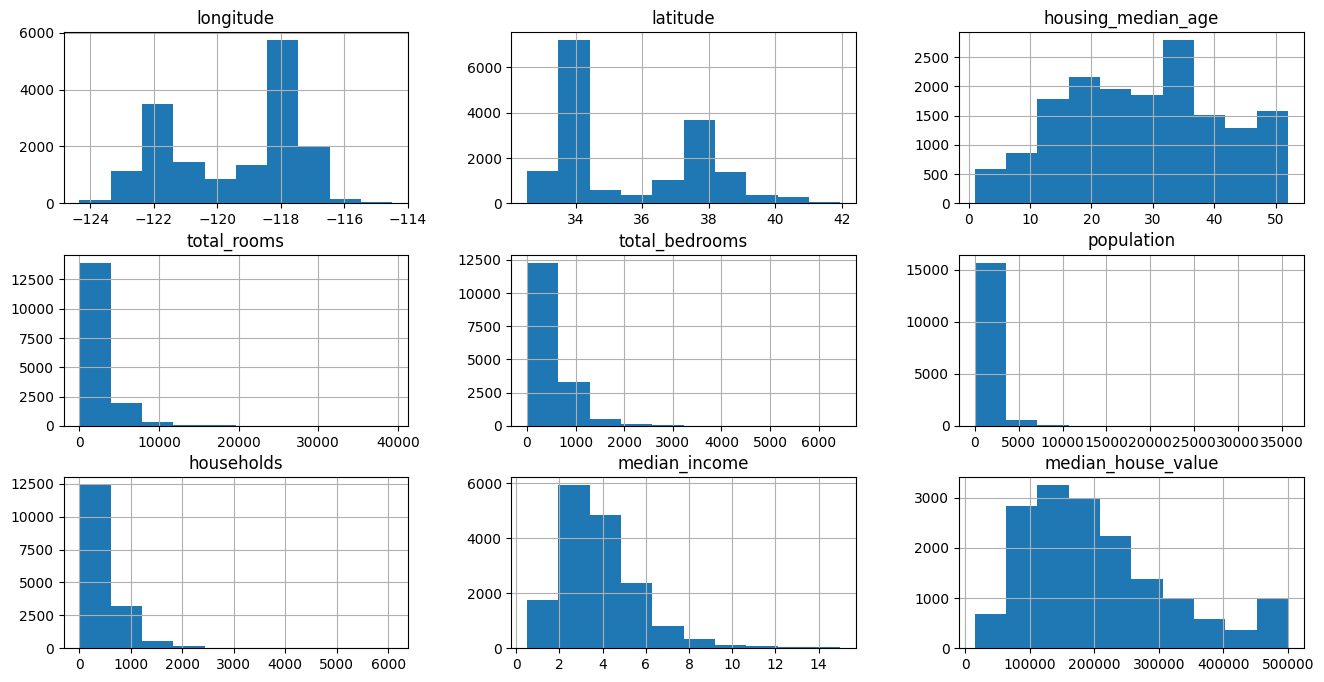

In [13]:
train_data.hist(figsize=(16,8))

<Axes: >

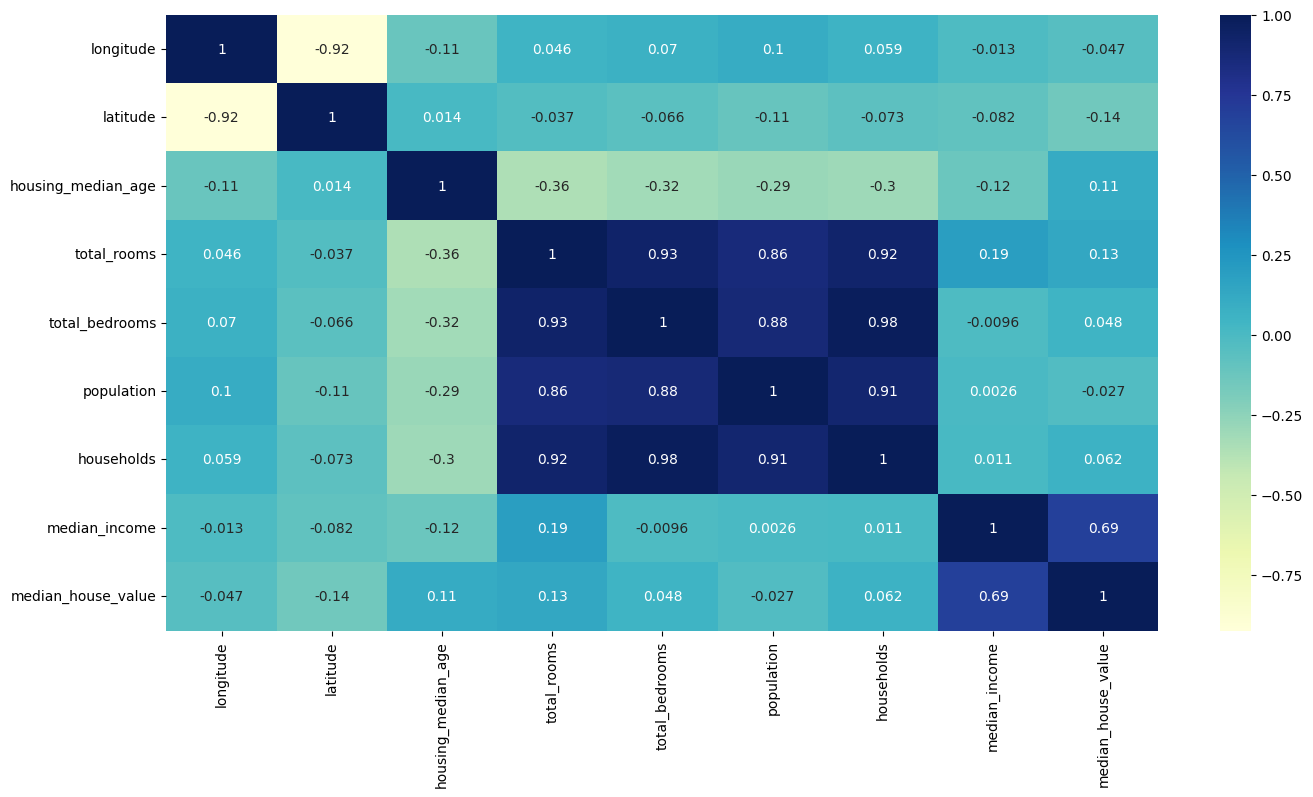

In [14]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

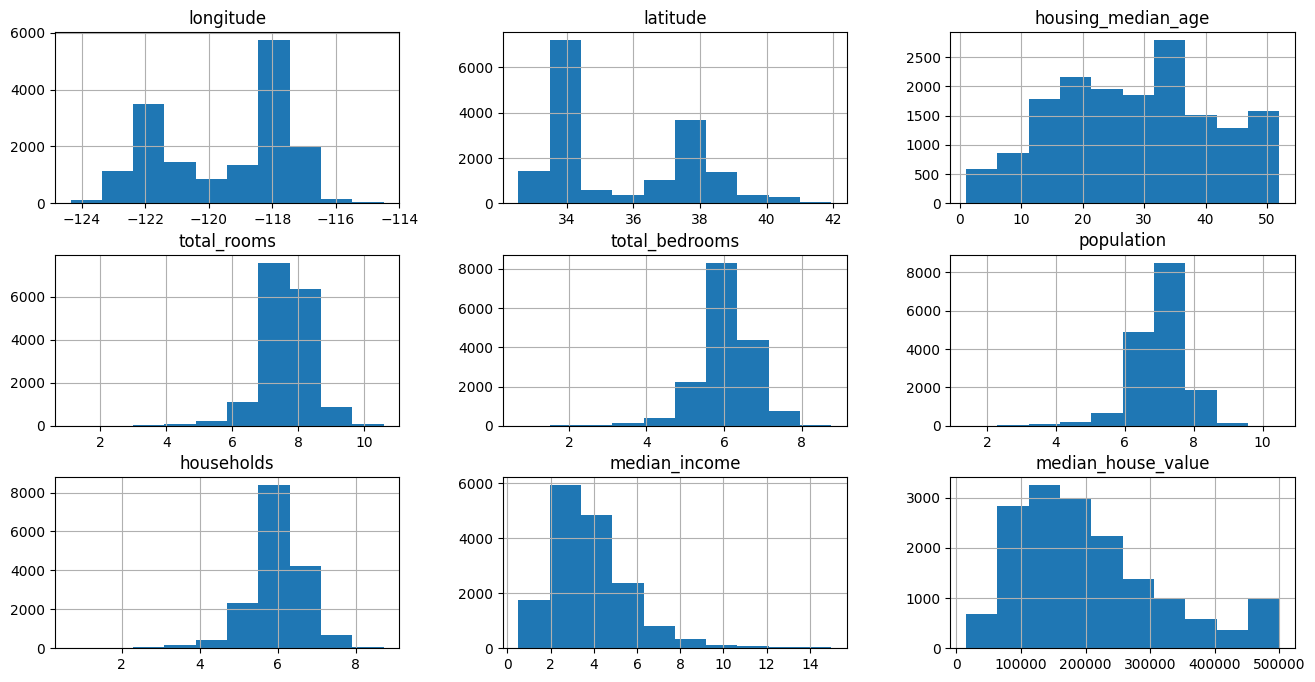

In [16]:
train_data.hist(figsize=(16,8))

In [17]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7249
INLAND        5216
NEAR OCEAN    2088
NEAR BAY      1789
ISLAND           4
Name: ocean_proximity, dtype: int64

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4327,-118.33,34.08,52.0,7.483244,6.120297,6.510258,6.086775,3.5083,500001.0,1,0,0,0,0
17077,-122.20,37.48,41.0,6.598509,5.049856,6.481577,4.948760,5.1654,233600.0,0,0,0,1,0
17159,-122.20,37.40,37.0,7.167809,5.273000,6.293419,5.262690,8.2782,500001.0,0,0,0,0,1
2908,-119.04,35.37,44.0,7.389564,5.739793,6.504288,5.707110,2.8750,82700.0,0,1,0,0,0
6376,-118.03,34.15,43.0,7.435438,5.648974,6.514713,5.590987,4.1797,486800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11674,-117.99,33.86,36.0,7.037906,5.433722,6.587550,5.393628,3.4167,187200.0,1,0,0,0,0
10889,-117.90,33.70,15.0,7.736307,6.532334,6.890609,6.453625,4.5757,162500.0,1,0,0,0,0
15691,-122.44,37.79,52.0,7.197435,5.023881,5.998937,5.062595,10.8783,500001.0,0,0,0,1,0
14374,-117.25,32.73,38.0,7.518064,5.676754,6.452049,5.648974,4.9125,383600.0,0,0,0,0,1


<Axes: >

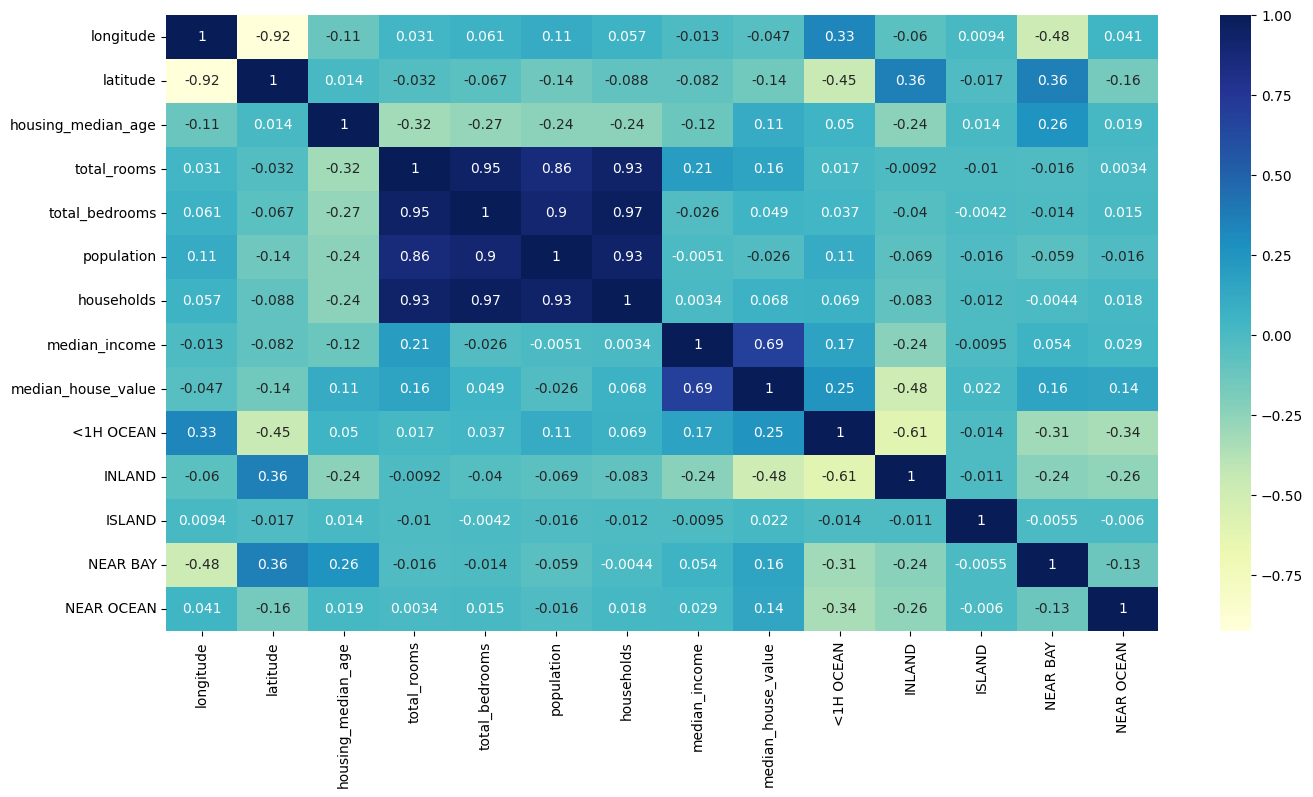

In [19]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

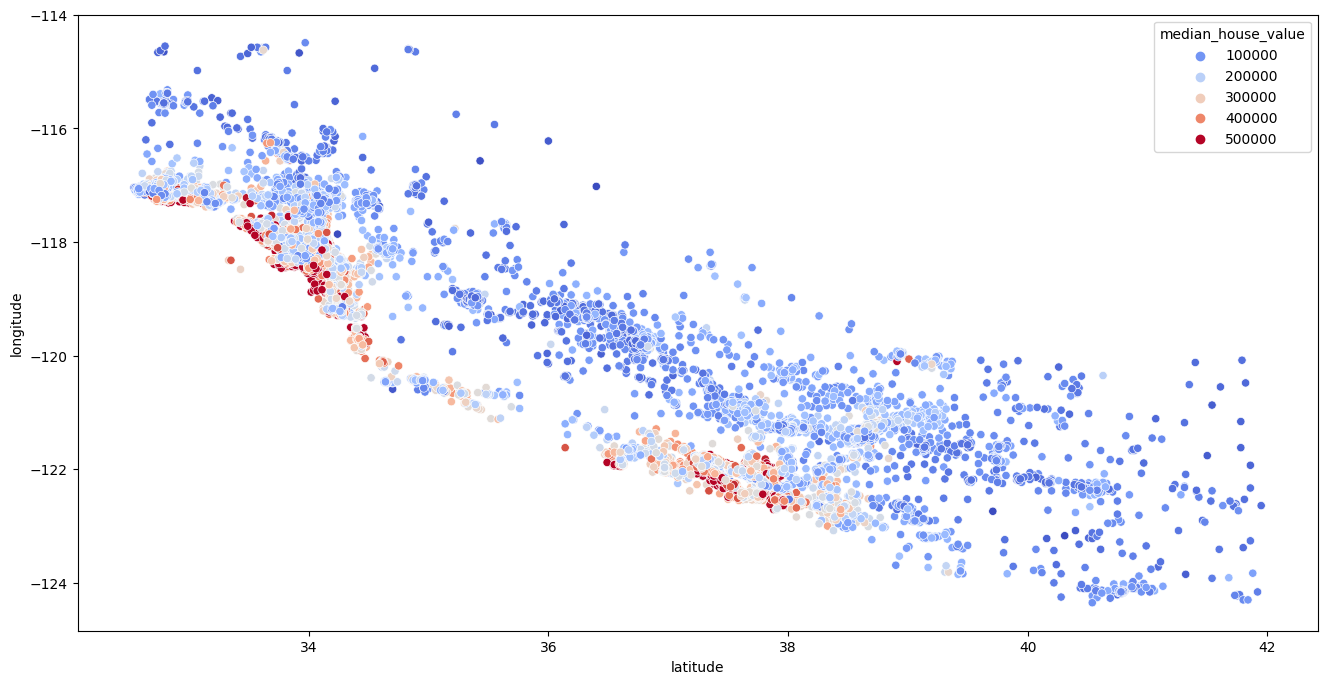

In [20]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

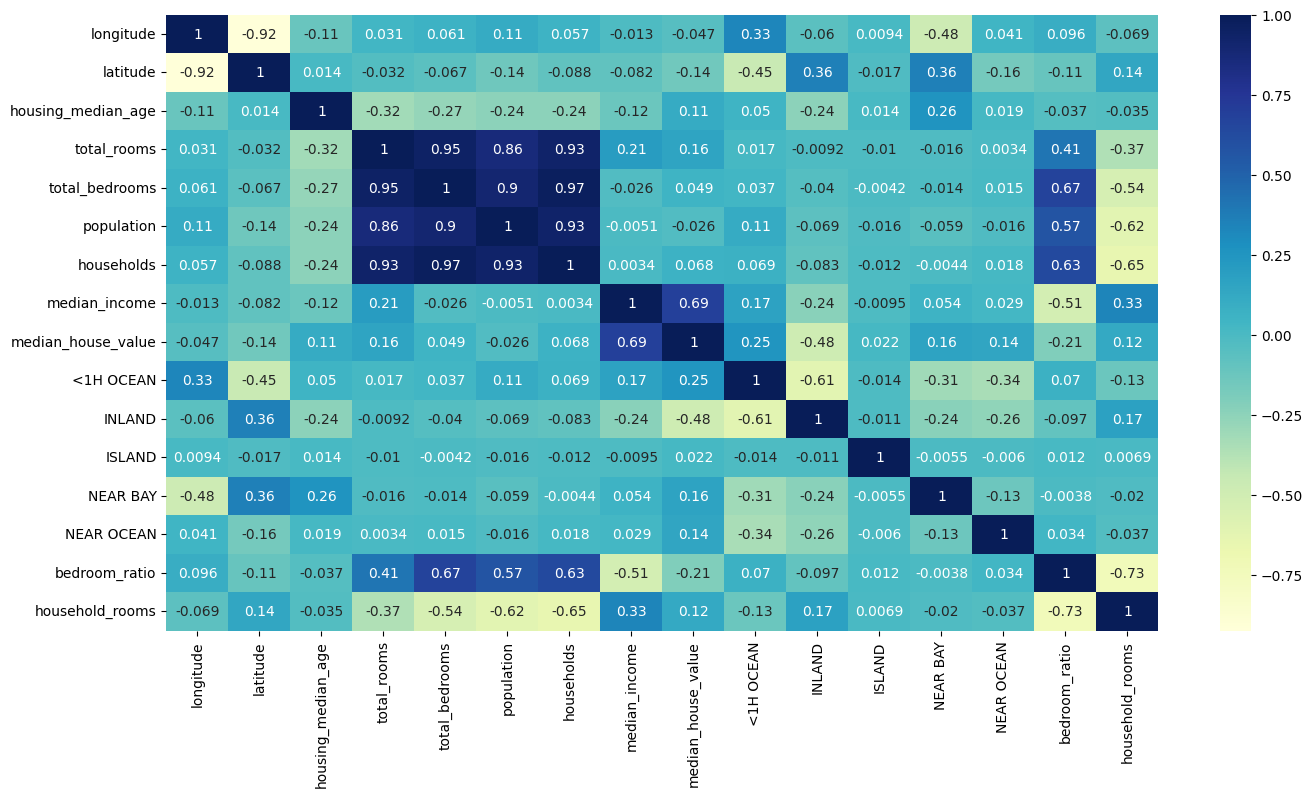

In [22]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [23]:
scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_scaled = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [25]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_scaled = scaler.transform(X_test)

In [26]:
reg.score(X_test_scaled, y_test)

0.6698519210479588

In [27]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [28]:
forest.score(X_test_scaled, y_test)

0.809845363863819

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
best_forest = grid_search.best_estimator_

In [31]:
best_forest.score(X_test_scaled, y_test)

0.8124237354070039